<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_Etv2_MEF_and_EB_v0_4_0_pathway_analysis_f5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare Up and Down regions in Nucleoatac, MACS2 and SeATAC between MEF and Flk1+ cells in Etv2 induced MEFs & EBs and Flk1+ cells in Etv2 induced EBs at day 2.5 through Pathway Analysis


This task runs on SeATAC `v0.4.0`

In [1]:
start_time <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'patchwork',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'
 )

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'patchwork', 'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db', 'clusterProfiler'

also installing the dependencies ‘rjson’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘filelock’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘restfulr’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘plogr’, ‘formatR’, ‘BiocFileCache’, ‘png’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [8]:
install_github("GreenleafLab/chromVARmotifs")

vctrs        (0.4.0 -> 0.4.1) [CRAN]
blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
scales       (1.1.1 -> 1.2.0) [CRAN]


Installing 4 packages: vctrs, blob, RColorBrewer, scales

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp9ExNYh/remotes553ae3bcb7/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 3 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/Rtmp9ExNYh/remotes557d3103db/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp9ExNYh/remotes55c7b3faa/YuLab-SMU-ChIPseeker-5945269/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [10]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 12 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp9ExNYh/remotes552ff788fe/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [11]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

## Parameters

In [12]:
ARGS <- list(
  vae_latent = c(5L),
  padjusted_cutoff = 0.05,
  param_mef = seq(0, 0.4, by = 0.1),
  param_eb = seq(0, 0.4, by = 0.1),
  upstream = -5000,
  downstream = 1000,
  pvalueCutoff  = 1,
  qvalueCutoff  = 1,
  log_ratio = 0.1,
  center_width = 100L # the center width
)

#MEF

## Etv2 motif regions with differential vplots

In [13]:
#tab <- read.table('https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_MEF_Etv2/results.tsv', sep = '\t', header = TRUE)

In [14]:
res_mef <- read.table('https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_MEF_Etv2/name1=MEF_NoDox_name2=MEF_Dox_D7_Flk1pos/bin_size=5_fragment_size_range_max=640_fragment_size_interval=10_block_size=640/min_reads=10_vae_num_peaks=5000/vae_latent=5_vae_filters0=128_vae_filters=32_vae_downsample_layers=4_vae_upsample_layers=4_vae_epochs=200.tsv', header = FALSE, sep = '\t')

In [15]:
colnames(res_mef) <- c('seqnames','start','end','width','strand','pvalue_z','padj','nucleosome_treatment','nucleosome_control','log_ratio')

In [16]:
res_mef <- GRanges(res_mef)

In [17]:
is_signif <- res_mef$padj < ARGS[['padjusted_cutoff']]
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6561



## Read the summits called by MACS2 for MEFs

In [18]:
remote_summit_files = c(
  MEF_NoDox = 'https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/macs2_Etv2_MEF_D7_Dox/1_summits.bed',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/macs2_Etv2_MEF_D7_Dox/2_summits.bed'
)
for (f in remote_summit_files){
  system(sprintf('wget -cx %s', f))
}
local_summit_files <- gsub('https://', './', remote_summit_files)

In [19]:
x1 <- read.table(local_summit_files[1], header = FALSE, sep = '\t')
x2 <- read.table(local_summit_files[2], header = FALSE, sep = '\t')
gr_macs <- list(x1, x2)
gr_mefs <- lapply(gr_macs, function(g){
  GRanges(seqnames = g[, 1], range = IRanges(start = g[, 2], end = g[, 3]), score = g[, 5])
}
)

In [20]:
sprintf('# of summits  called by MACS2 in undifferentiated MEFs: %d', length(gr_mefs[[1]])) %>% message()
sprintf('# of summits called by MACS2 in Flk1+ MEFs at D7 post Etv2 induction: %d', length(gr_mefs[[2]])) %>% message()

# of summits  called by MACS2 in undifferentiated MEFs: 53093

# of summits called by MACS2 in Flk1+ MEFs at D7 post Etv2 induction: 4639



In [21]:
names(gr_mefs) <- c('MEF','Flk1pos')

Instead of looking at the overlap between MACS2 summits with the entire 640 bp V-plot window, we only look at the center 100 bp region, which is consistent with the way that SeATAC calculate the central nucleosome values

In [22]:
mm <- lapply(gr_mefs, function(g){
  findOverlaps(g, resize(res_mef, fix = 'center', width = ARGS[['center_width']])) %>% as.matrix()
}
)

In [23]:
mm <- lapply(names(mm), function(i){
  cbind(mm[[i]], score = gr_mefs[[i]][mm[[i]][, 'queryHits']]$score)
}
)
names(mm) <- c('MEF','Flk1pos')




In [24]:
sp <- lapply(mm, function(m){
  split(m[, 'score'], list(m[, 'subjectHits']))
}
)

In [25]:
score_mef <- sapply(sp$MEF, max)
score_flk1pos <- sapply(sp$Flk1pos, max)

##Nucleoatac data

In [26]:
s3_bw_files <- c(
  'Flk1pos' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228a/MEF_Dox_D7_Flk1pos.nucleoatac_signal.smooth.bw',
  'MEF' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228a/MEF_NoDox.nucleoatac_signal.smooth.bw'
)

In [27]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [28]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(res_mef, fix = 'center', width = ARGS[['center_width']])))
  ) 
})

In [29]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(res_mef, fix = 'center', width = ARGS[['center_width']])] %>% as.matrix()})

In [30]:
cvg <- data.frame(Flk1pos = rowMeans(cvg_bd$Flk1pos), MEF = rowMeans(cvg_bd$MEF))

In [31]:
cvg$flk1pos <- ifelse(cvg$Flk1pos < cvg$MEF, 'TRUE','FALSE')

In [32]:
cvg$mef <- ifelse(cvg$Flk1pos > cvg$MEF, 'TRUE','FALSE')

In [33]:
cvg$difference <- cvg$Flk1pos - cvg$MEF

Peaks into up and down mefs

In [34]:
up_mef <- res_mef        #Up in undifferentiated MEFs
up_mef$macs2 <- 0
up_mef[as.numeric(names(score_mef))]$macs2 <- score_mef
up_mef$seatac <- -log10(up_mef$padj + 1e-100)
up_mef$difference <- cvg$difference
up_mef$mef <- cvg$mef


In [35]:
down_mef <- res_mef      #Down in undifferentiated MEFs
down_mef$macs2 <- 0
down_mef[as.numeric(names(score_flk1pos))]$macs2 <- score_flk1pos
down_mef$seatac <- -log10(down_mef$padj + 1e-100)
down_mef$difference <- cvg$difference
down_mef$flk1pos <- cvg$flk1pos

##Pathway analysis for MEFs

In [36]:
mef_peaks_up <- list(seatac = up_mef[up_mef$log_ratio > ARGS[['log_ratio']] & up_mef$padj < ARGS[['padjusted_cutoff']]], 
  macs2 = up_mef[up_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])],
  nucleoatac = up_mef[up_mef$difference > 0.4 & up_mef$mef == TRUE]
  )

In [37]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in Flk1+ MEFs at D7 post Etv2 induction with log ratio cutoff of 0.1 : %d', length(mef_peaks_up[[1]])) %>% message()
sprintf('# of summits called by MACS2 in Flk1+ MEFs at D7 post Etv2 induction : %d', length(mef_peaks_up[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in Flk1+ MEFs at D7 post Etv2 induction : %d', length(mef_peaks_up[[3]])) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center in Flk1+ MEFs at D7 post Etv2 induction with log ratio cutoff of 0.1 : 1003

# of summits called by MACS2 in Flk1+ MEFs at D7 post Etv2 induction : 1683

# of regions with increased nucleosome occupancy in Flk1+ MEFs at D7 post Etv2 induction : 1092



In [38]:
mef_peaks_down <- list(seatac = down_mef[down_mef$log_ratio < -ARGS[['log_ratio']] & down_mef$padj < ARGS[['padjusted_cutoff']]], 
  macs2 = down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])],
  nucleoatac = down_mef[down_mef$difference < -0.4 & down_mef$flk1pos == TRUE]
  )

In [39]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in undifferentiated MEFs with log ratio cutoff of 0.1 : %d', length(mef_peaks_down[[1]])) %>% message()
sprintf('# of summits called by MACS2 in undifferentiated MEFs : %d', length(mef_peaks_down[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in undifferentiated MEFs : %d', length(mef_peaks_down[[3]])) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center in undifferentiated MEFs with log ratio cutoff of 0.1 : 3451

# of summits called by MACS2 in undifferentiated MEFs : 558

# of regions with increased nucleosome occupancy in undifferentiated MEFs : 1686



###Annotate the peaks for MEF

In [40]:
anno_up_mef <- lapply(mef_peaks_up, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-18 02:27:42 AM 
>> identifying nearest features...		 2022-04-18 02:27:42 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:27:43 AM 
>> assigning genomic annotation...		 2022-04-18 02:27:43 AM 
>> adding gene annotation...			 2022-04-18 02:28:02 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:28:02 AM 
>> done...					 2022-04-18 02:28:02 AM 
>> preparing features information...		 2022-04-18 02:28:02 AM 
>> identifying nearest features...		 2022-04-18 02:28:02 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:28:03 AM 
>> assigning genomic annotation...		 2022-04-18 02:28:03 AM 
>> adding gene annotation...			 2022-04-18 02:28:06 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:28:06 AM 
>> done...					 2022-04-18 02:28:06 AM 
>> preparing features information...		 2022-04-18 02:28:06 AM 
>> identifying nearest features...		 2022-04-18 02:28:06 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:28:07 AM 
>> assigning genomic annotation...		 2022-04-18 02:28:07 AM 
>> adding gene annotation...			 2022-04-18 02:28:09 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:28:09 AM 
>> done...					 2022-04-18 02:28:09 AM 


In [41]:
dat_up_mef <- lapply(anno_up_mef, function(x){
  data.frame(x)
})

In [42]:
go_up_mef <- lapply(dat_up_mef, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [43]:
anno_down_mef <- lapply(mef_peaks_down, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-18 02:29:46 AM 
>> identifying nearest features...		 2022-04-18 02:29:46 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:29:47 AM 
>> assigning genomic annotation...		 2022-04-18 02:29:47 AM 
>> adding gene annotation...			 2022-04-18 02:29:49 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:29:49 AM 
>> done...					 2022-04-18 02:29:49 AM 
>> preparing features information...		 2022-04-18 02:29:49 AM 
>> identifying nearest features...		 2022-04-18 02:29:49 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:29:50 AM 
>> assigning genomic annotation...		 2022-04-18 02:29:50 AM 
>> adding gene annotation...			 2022-04-18 02:29:52 AM 


'select()' returned 1:1 mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:29:52 AM 
>> done...					 2022-04-18 02:29:52 AM 
>> preparing features information...		 2022-04-18 02:29:52 AM 
>> identifying nearest features...		 2022-04-18 02:29:52 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:29:53 AM 
>> assigning genomic annotation...		 2022-04-18 02:29:53 AM 
>> adding gene annotation...			 2022-04-18 02:29:56 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:29:56 AM 
>> done...					 2022-04-18 02:29:56 AM 


In [44]:
dat_down_mef <- lapply(anno_down_mef, function(x){
  data.frame(x)
})

In [45]:
go_down_mef <- lapply(dat_down_mef, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [46]:
mef_up_endo <- lapply(go_up_mef, function(g){
  g[grepl('endothelial|vascular|circulatory', g$Description, ignore.case = TRUE),]
})
mef_up_endo <- lapply(mef_up_endo, function(g){
  g[!grepl('negative|positive|regulation', g$Description, ignore.case = TRUE),]
})

In [47]:
mef_down_endo <- lapply(go_down_mef, function(g){
  g[grepl('endothelial|vascular|circulatory', g$Description, ignore.case = TRUE),]
})
mef_down_endo <- lapply(mef_down_endo, function(g){
  g[!grepl('negative|positive|regulation', g$Description, ignore.case = TRUE),]
})

## Long dataframe for MEF

In [48]:
mef_up_endo <- Map(cbind, mef_up_endo, method = as.factor(names(mef_up_endo)))

In [49]:
mef_down_endo <- Map(cbind, mef_down_endo, method = as.factor(names(mef_down_endo)))

In [50]:
df_up_mef <- do.call('rbind', mef_up_endo)
df_down_mef <- do.call('rbind', mef_down_endo)

In [51]:
df_up_mef$direction <- 'Up'
df_down_mef$direction <- 'Down'

In [52]:
df_mef <- rbind(df_up_mef, df_down_mef)

In [53]:
df_mef <- df_mef[,c('ID','Description','p.adjust', 'Count', 'method', 'direction','GeneRatio')]

In [54]:
df_mef$system <- 'MEF'

#EB

## Etv2 motif regions with differential vplots

In [55]:
tab <- read.table('https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_EB_Etv2/results.tsv', sep = '\t', header = TRUE)

In [56]:
res_eb <- read.table(tab[tab$vae_latent == ARGS[['vae_latent']],]$remote_output_file, header = FALSE, sep = '\t')

In [57]:
colnames(res_eb) <- c('seqnames','start','end','width','strand','pvalue_z','padj','nucleosome_treatment','nucleosome_control','log_ratio')

In [58]:
res_eb <- GRanges(res_eb)

In [59]:
is_signif <- res_eb$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6275



## Read the summits called by MACS2 for EBs

In [60]:
remote_summit_files = c(
  EB_NoDox_D25 = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_Etv2_EB_Dox_D25_Flk1pos/1_summits.bed',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_Etv2_EB_Dox_D25_Flk1pos/2_summits.bed'
)
for (f in remote_summit_files){
  system(sprintf('wget -cx %s', f))
}
local_summit_files <- gsub('https://', './', remote_summit_files)

In [61]:
x1 <- read.table(local_summit_files[1], header = FALSE, sep = '\t')
x2 <- read.table(local_summit_files[2], header = FALSE, sep = '\t')
gr_macs <- list(x1, x2)
gr_ebs <- lapply(gr_macs, function(g){
  GRanges(seqnames = g[, 1], range = IRanges(start = g[, 2], end = g[, 3]), score = g[, 5])
}
)

In [62]:
sprintf('# of summits  called by MACS2 in undifferentiated EBs: %d', length(gr_ebs[[1]])) %>% message()
sprintf('# of summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction: %d', length(gr_ebs[[2]])) %>% message()

# of summits  called by MACS2 in undifferentiated EBs: 30791

# of summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction: 5323



In [63]:
names(gr_ebs) <- c('EB','Flk1pos')

Instead of looking at the overlap between MACS2 summits with the entire 640 bp V-plot window, we only look at the center 100 bp region, which is consistent with the way that SeATAC calculate the central nucleosome values

In [64]:
mm <- lapply(gr_ebs, function(g){
  findOverlaps(g, resize(res_eb, fix = 'center', width = ARGS[['center_width']])) %>% as.matrix()
}
)

In [65]:
mm <- lapply(names(mm), function(i){
  cbind(mm[[i]], score = gr_ebs[[i]][mm[[i]][, 'queryHits']]$score)
}
)
names(mm) <- c('EB','Flk1pos')




In [66]:
sp <- lapply(mm, function(m){
  split(m[, 'score'], list(m[, 'subjectHits']))
}
)

In [67]:
score_eb <- sapply(sp$EB, max)
score_eb_flk1pos <- sapply(sp$Flk1pos, max)

##Nucleoatac data

In [68]:
s3_bw_files <- c(
  'EB_Flk1pos' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228a/EB_Dox_D25_Flk1pos.nucleoatac_signal.smooth.bw',
  'EB' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.nucleoatac_signal.smooth.bw'
)

In [69]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [70]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(res_eb, fix = 'center', width = ARGS[['center_width']])))
  ) 
})

In [71]:
cvg_eb <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(res_eb, fix = 'center', width = ARGS[['center_width']])] %>% as.matrix()})

In [72]:
lapply(cvg_eb, function(c){quantile(rowMeans(c), seq(0,1,by=0.1))})

$EB_Flk1pos
           0%           10%           20%           30%           40% 
-6.971166e-13  4.768581e-15  1.158129e-03  1.167440e-02  3.563176e-02 
          50%           60%           70%           80%           90% 
 6.964821e-02  1.129227e-01  1.661709e-01  2.376621e-01  3.656683e-01 
         100% 
 1.138948e+01 

$EB
           0%           10%           20%           30%           40% 
-2.233558e-13  1.637193e-13  8.586138e-03  3.339281e-02  7.146698e-02 
          50%           60%           70%           80%           90% 
 1.170039e-01  1.713475e-01  2.446401e-01  3.485849e-01  5.469487e-01 
         100% 
 1.495253e+01

In [73]:
cvg_eb <- data.frame(Flk1pos = rowMeans(cvg_eb$EB_Flk1pos), EB = rowMeans(cvg_eb$EB))

In [74]:
cvg_eb$flk1pos <- ifelse(cvg_eb$Flk1pos < cvg_eb$EB, 'TRUE','FALSE')

In [75]:
cvg_eb$eb <- ifelse(cvg_eb$Flk1pos > cvg_eb$EB, 'TRUE','FALSE')

In [76]:
cvg_eb$difference <- cvg_eb$Flk1pos - cvg_eb$EB

In [77]:
head(cvg_eb)

,Flk1pos,EB,flk1pos,eb,difference
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,6.744793e-02,0.27878289,TRUE,FALSE,-0.21133496
2,1.820812e-01,0.45273087,TRUE,FALSE,-0.27064966
3,9.866240e-17,0.02942368,TRUE,FALSE,-0.02942368
4,4.854407e-15,0.34125701,TRUE,FALSE,-0.34125701
5,2.497212e-01,0.17375628,FALSE,TRUE,0.07596491
6,3.761186e-03,0.24197423,TRUE,FALSE,-0.23821305


In [78]:
up_eb <- res_eb        #Up in undifferentiated MEFs
up_eb$macs2 <- 0
up_eb[as.numeric(names(score_eb))]$macs2 <- score_eb
up_eb$seatac <- -log10(up_eb$padj + 1e-100)
up_eb$difference <- cvg_eb$difference
up_eb$eb <- cvg_eb$eb


In [79]:
down_eb <- res_eb       #Down in undifferentiated MEFs
down_eb$macs2 <- 0
down_eb[as.numeric(names(score_eb_flk1pos))]$macs2 <- score_eb_flk1pos
down_eb$seatac <- -log10(down_eb$padj + 1e-100)
down_eb$difference <- cvg_eb$difference
down_eb$flk1pos <- cvg_eb$flk1pos

##Pathway analysis for EBs

In [80]:
eb_peaks_up <- lapply(ARGS[['param_eb']], function(x){
  up_eb[up_eb$log_ratio > x & up_eb$padj < ARGS[['padjusted_cutoff']]]
})
names(eb_peaks_up) <- as.character(ARGS[['param_eb']])

In [81]:
eb_peaks_up <- list(seatac = up_eb[up_eb$log_ratio > ARGS[['log_ratio']] & up_eb$padj < ARGS[['padjusted_cutoff']]],
 macs2 = up_eb[up_eb$macs2 > -log10(ARGS[['padjusted_cutoff']])],
 nucleoatac = up_eb[up_eb$difference > 0.4 & up_eb$eb == TRUE])


In [82]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in Flk1+ EBs at D2.5 post Etv2 induction with log ratio cutoff of 0.1 : %d', length(eb_peaks_up[[1]])) %>% message()
sprintf('# of summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction : %d', length(eb_peaks_up[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in Flk1+ EBs at D2.5 post Etv2 induction : %d', length(eb_peaks_up[[3]])) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center in Flk1+ EBs at D2.5 post Etv2 induction with log ratio cutoff of 0.1 : 1410

# of summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction : 491

# of regions with increased nucleosome occupancy in Flk1+ EBs at D2.5 post Etv2 induction : 732



In [83]:
eb_peaks_down <- list(seatac = down_eb[down_eb$log_ratio < -ARGS[['log_ratio']] & down_eb$padj < ARGS[['padjusted_cutoff']]],
 macs2 = down_eb[down_eb$macs2 > -log10(ARGS[['padjusted_cutoff']])],
 nucleoatac = down_eb[down_eb$difference < -0.4 & down_eb$flk1pos == TRUE])

In [84]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in undifferentiated EBs with log ratio cutoff of 0.1 : %d', length(eb_peaks_down[[1]])) %>% message()
sprintf('# of summits called by MACS2 in undifferentiated EBs : %d', length(eb_peaks_down[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in undifferentiated EBs : %d', length(eb_peaks_down[[3]])) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center in undifferentiated EBs with log ratio cutoff of 0.1 : 2342

# of summits called by MACS2 in undifferentiated EBs : 760

# of regions with increased nucleosome occupancy in undifferentiated EBs : 2537



###Annotate the peaks for EBs

In [85]:
anno_up_eb <- lapply(eb_peaks_up, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-18 02:31:40 AM 
>> identifying nearest features...		 2022-04-18 02:31:40 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:31:40 AM 
>> assigning genomic annotation...		 2022-04-18 02:31:40 AM 
>> adding gene annotation...			 2022-04-18 02:31:43 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:31:43 AM 
>> done...					 2022-04-18 02:31:43 AM 
>> preparing features information...		 2022-04-18 02:31:43 AM 
>> identifying nearest features...		 2022-04-18 02:31:43 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:31:44 AM 
>> assigning genomic annotation...		 2022-04-18 02:31:44 AM 
>> adding gene annotation...			 2022-04-18 02:31:46 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:31:47 AM 
>> done...					 2022-04-18 02:31:47 AM 
>> preparing features information...		 2022-04-18 02:31:47 AM 
>> identifying nearest features...		 2022-04-18 02:31:47 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:31:47 AM 
>> assigning genomic annotation...		 2022-04-18 02:31:47 AM 
>> adding gene annotation...			 2022-04-18 02:31:49 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:31:50 AM 
>> done...					 2022-04-18 02:31:50 AM 


In [86]:
dat_up_eb<- lapply(anno_up_eb, function(x){
  data.frame(x)
})

#Genes at promoters

In [88]:
sub <- dat_up_eb[[1]][grepl('Promoter',dat_up_eb[[1]]$annotation),]

In [90]:
sub_go <- enrichGO(gene = sub$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)

In [96]:
go_up_eb <- lapply(dat_up_eb, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [98]:
anno_down_eb <- lapply(eb_peaks_down, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-18 02:33:09 AM 
>> identifying nearest features...		 2022-04-18 02:33:09 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:33:10 AM 
>> assigning genomic annotation...		 2022-04-18 02:33:10 AM 
>> adding gene annotation...			 2022-04-18 02:33:12 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:33:12 AM 
>> done...					 2022-04-18 02:33:12 AM 
>> preparing features information...		 2022-04-18 02:33:12 AM 
>> identifying nearest features...		 2022-04-18 02:33:12 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:33:13 AM 
>> assigning genomic annotation...		 2022-04-18 02:33:13 AM 
>> adding gene annotation...			 2022-04-18 02:33:15 AM 


'select()' returned 1:1 mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:33:15 AM 
>> done...					 2022-04-18 02:33:15 AM 
>> preparing features information...		 2022-04-18 02:33:15 AM 
>> identifying nearest features...		 2022-04-18 02:33:15 AM 
>> calculating distance from peak to TSS...	 2022-04-18 02:33:16 AM 
>> assigning genomic annotation...		 2022-04-18 02:33:16 AM 
>> adding gene annotation...			 2022-04-18 02:33:19 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 02:33:19 AM 
>> done...					 2022-04-18 02:33:19 AM 


In [99]:
dat_down_eb <- lapply(anno_down_eb, function(x){
  data.frame(x)
})

In [100]:
go_down_eb <- lapply(dat_down_eb, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [101]:
eb_up_top20 <- lapply(go_up_eb, function(g){
  head(g, 20)
})
eb_up_top20 <- lapply(eb_up_top20, function(g){
  g[!grepl('negative|positive|regulation', g$Description, ignore.case = TRUE),]
})

In [102]:
eb_up_endo <- lapply(go_up_eb, function(g){
  g[grepl('endothelial|vascular|circulatory', g$Description, ignore.case = TRUE),]
})
eb_up_endo <- lapply(eb_up_endo, function(g){
  g[!grepl('negative|positive|regulation', g$Description, ignore.case = TRUE),]
})

In [103]:
eb_down_endo <- lapply(go_down_eb, function(g){
  g[grepl('endothelial|vascular|circulatory', g$Description, ignore.case = TRUE),]
})
eb_down_endo <- lapply(eb_down_endo, function(g){
  g[!grepl('negative|positive|regulation', g$Description, ignore.case = TRUE),]
})

## Long dataframe for EB

In [104]:
eb_up_endo <- Map(cbind, eb_up_endo, method = as.factor(names(eb_up_endo)))

In [106]:
eb_down_endo <- Map(cbind, eb_down_endo, method = as.factor(names(eb_down_endo)))

In [107]:
df_up_eb <- do.call('rbind', eb_up_endo)
df_down_eb <- do.call('rbind', eb_down_endo)

In [108]:
df_up_eb$direction <- 'Up'
df_down_eb$direction <- 'Down'

In [109]:
df_eb <- rbind(df_up_eb, df_down_eb)

In [110]:
df_eb <- df_eb[,c('ID','Description','p.adjust', 'Count', 'method', 'direction', 'GeneRatio')]

In [111]:
df_eb$system <- 'EB'

#Long DF for MEF and EB


## This dataset contains Pathway terms with an adjusted p-value, log_ratio, method(SeATAC & MACS2), and the system EBs and MEFs

In [112]:
df <- rbind(df_mef, df_eb)

In [113]:
df$system <- as.factor(df$system)
df$direction <- as.factor(df$direction)

In [115]:
long_df <- df[df$Description %in% c('endothelial cell proliferation', 'blood vessel endothelial cell migration', 'vascular endothelial growth factor signaling pathway', 'vascular process in circulatory system', 'endothelial cell activation' ),]

#Plots for pathway analysis comparing different log ratio cutoffs for seatac along with MACS2 for both EBs and MEFs when Flk1+ MEFs and EBs are Up

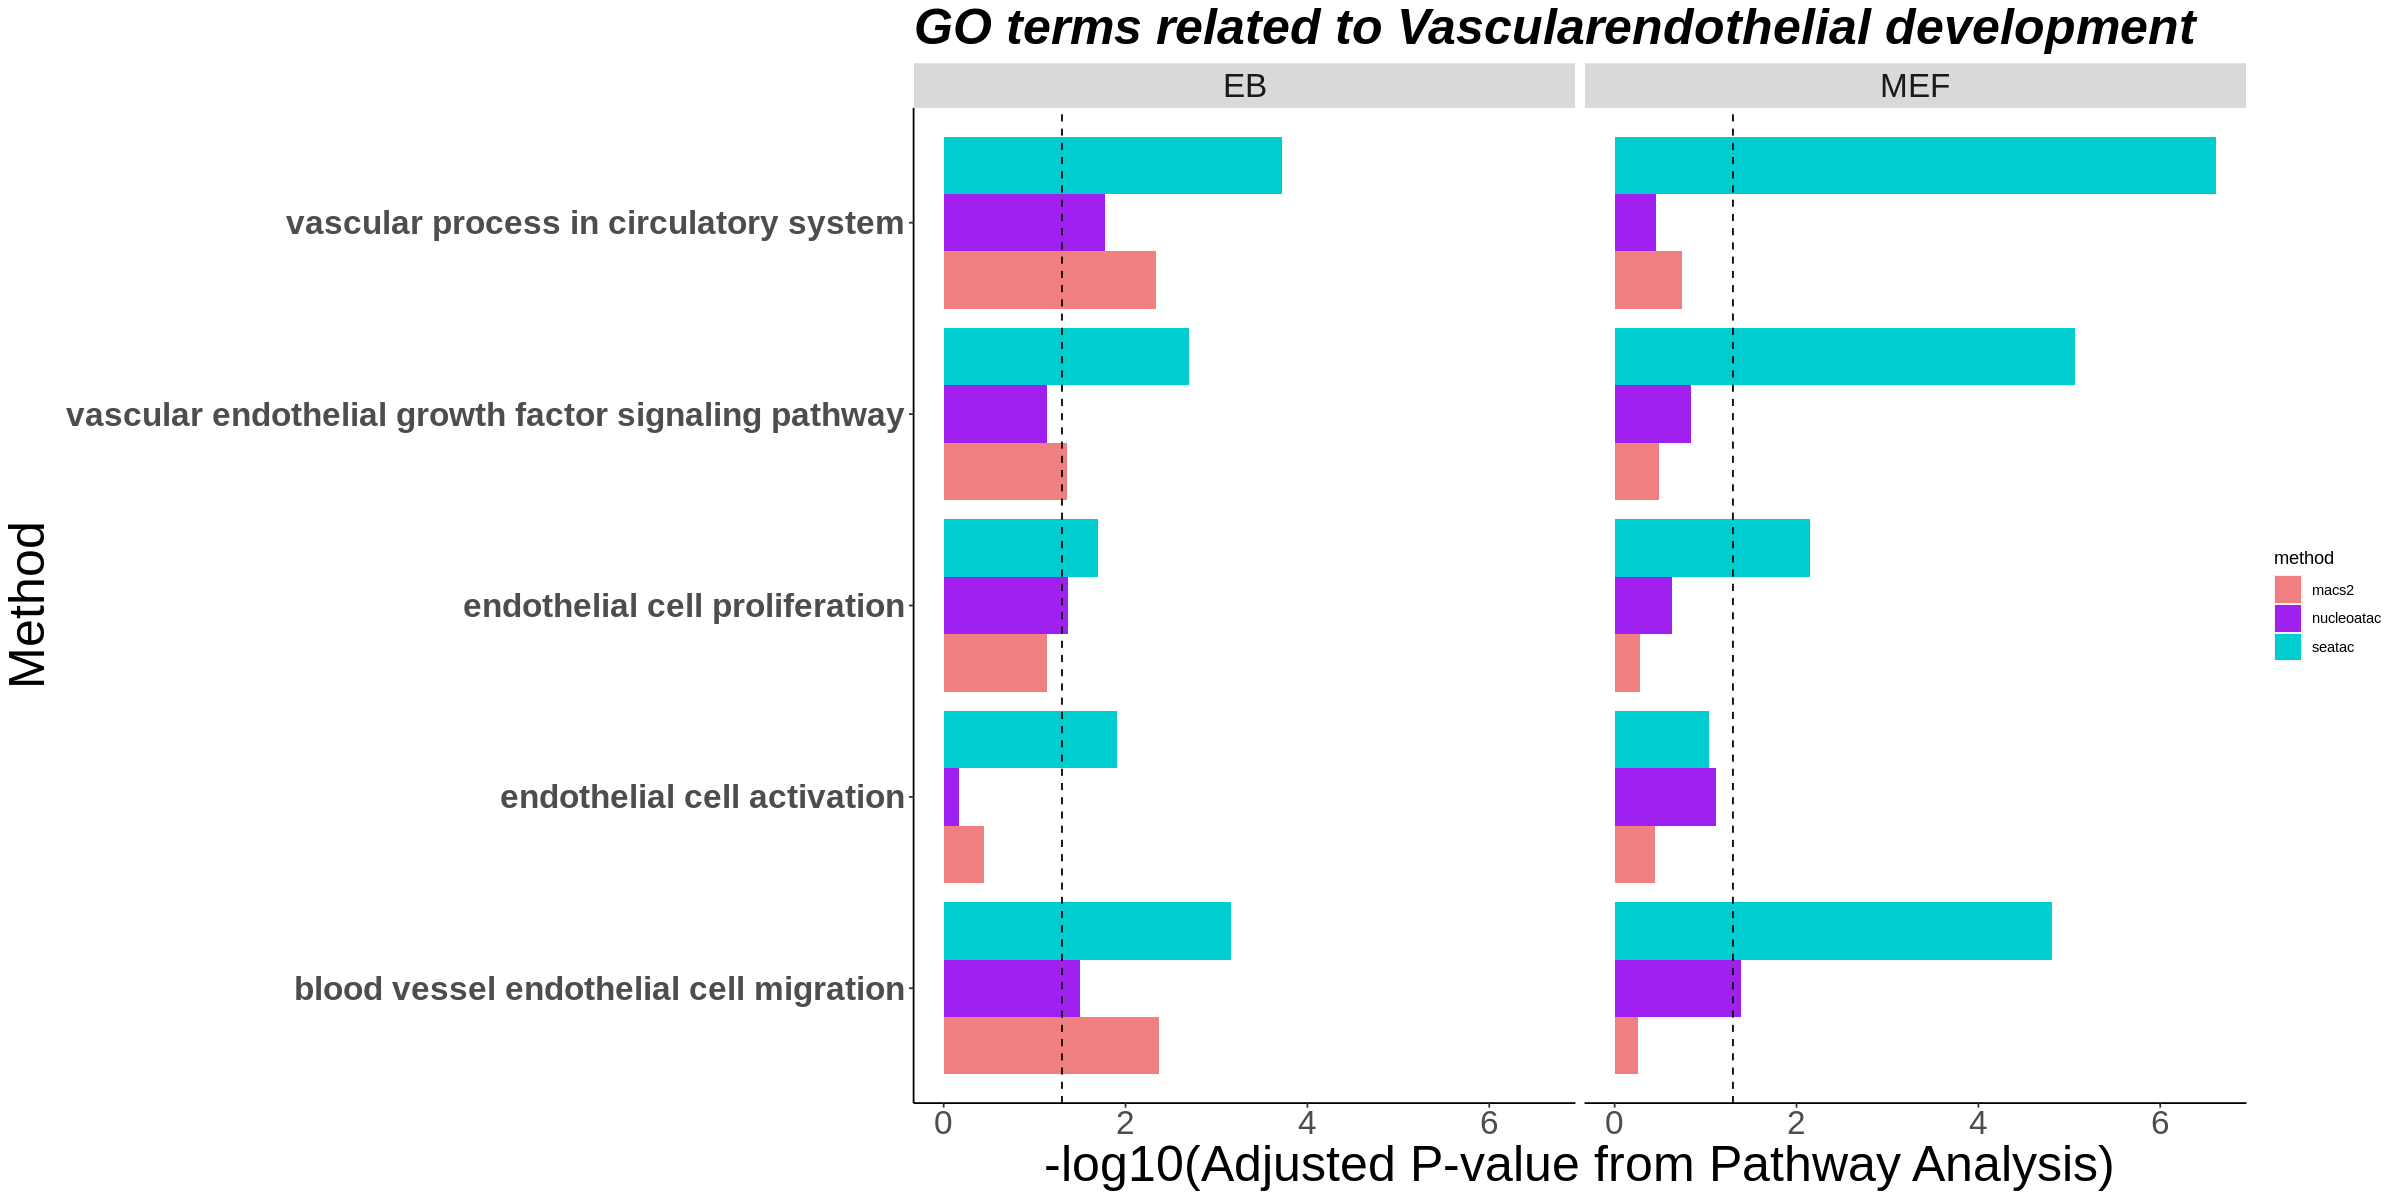

In [117]:
options(repr.plot.width = 20, repr.plot.height = 10)
long_df %>%
  filter(direction == 'Down') %>%
  ggplot(aes(x = Description, y = -log10(p.adjust), fill = method)) + 
    geom_bar(stat='identity', position='dodge') +
    facet_wrap( ~ system) + 
    geom_hline(yintercept = -log10(0.05), linetype = 'dashed') +
    coord_flip() +
    scale_fill_manual(values = c('lightcoral','purple','cyan3')) +
    xlab('Method') +
    ylab('-log10(Adjusted P-value from Pathway Analysis)') +
    ggtitle('GO terms related to Vascularendothelial development') +
    theme(
           strip.text = element_text(size = 20),
           axis.title.x = element_text(size = 30),
           axis.title.y = element_text(size = 30),
           axis.text.x = element_text(size = 20),
           axis.text.y = element_text(size = 20, face = 'bold'),
           plot.title = element_text(size=30, face='bold.italic'),
           panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank(),
           panel.background = element_blank(), 
           axis.line = element_line(colour = "black")
           ) 


#Venn Diagram

(polygon[GRID.polygon.455], polygon[GRID.polygon.456], polygon[GRID.polygon.457], polygon[GRID.polygon.458], polygon[GRID.polygon.459], polygon[GRID.polygon.460], text[GRID.text.461], text[GRID.text.462], text[GRID.text.463], text[GRID.text.464], text[GRID.text.465], text[GRID.text.466], text[GRID.text.467], text[GRID.text.468], text[GRID.text.469]) 

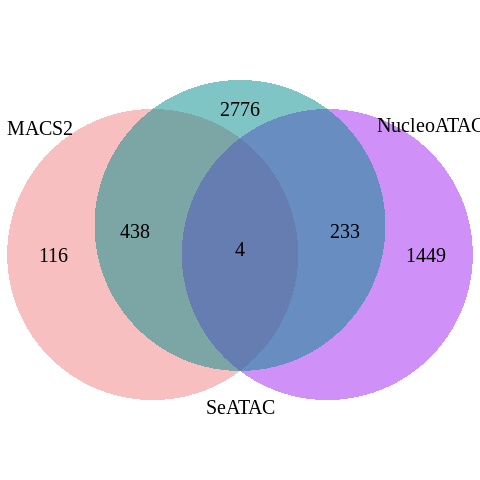

In [120]:
options(repr.plot.width=4, repr.plot.height=4)
draw.triple.venn(
    area1 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio']] & down_mef$padj < ARGS[['padjusted_cutoff']]]),                         # Create venn diagram with three sets
    area2 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    area3 = length(down_mef[down_mef$difference < -0.4 & down_mef$flk1pos == TRUE]),
    n12 = length(down_mef[down_mef$log_ratio  < -ARGS[['log_ratio']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    n23 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.4 & down_mef$flk1pos == TRUE]),
    n13 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$difference < -0.4 & down_mef$flk1pos == TRUE]), 
    n123 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.4 & down_mef$flk1pos == TRUE]),
    category = c("SeATAC", 'MACS2','NucleoATAC'), 
    lty = "blank", 
    fill = c("cyan4", "lightcoral","purple"),
    scale = FALSE
    )

(polygon[GRID.polygon.470], polygon[GRID.polygon.471], polygon[GRID.polygon.472], polygon[GRID.polygon.473], polygon[GRID.polygon.474], polygon[GRID.polygon.475], text[GRID.text.476], text[GRID.text.477], text[GRID.text.478], text[GRID.text.479], text[GRID.text.480], text[GRID.text.481], text[GRID.text.482], text[GRID.text.483], text[GRID.text.484], text[GRID.text.485]) 

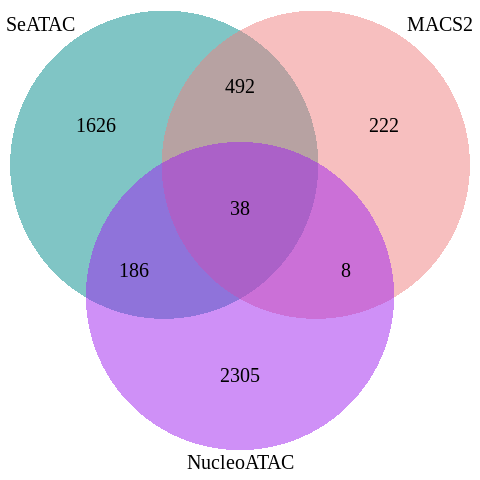

In [122]:
options(repr.plot.width=4, repr.plot.height=4)
draw.triple.venn(
    area1 = length(down_eb[down_eb$log_ratio < -ARGS[['log_ratio']] & down_eb$padj < ARGS[['padjusted_cutoff']]]),                         # Create venn diagram with three sets
    area2 = length(down_eb[down_eb$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    area3 = length(down_eb[down_eb$difference < -0.4 & down_eb$flk1pos == TRUE]),
    n12 = length(down_eb[down_eb$log_ratio  < -ARGS[['log_ratio']] & down_eb$padj < ARGS[['padjusted_cutoff']] & down_eb$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    n23 = length(down_eb[down_eb$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_eb$difference < -0.4 & down_eb$flk1pos == TRUE]),
    n13 = length(down_eb[down_eb$log_ratio < -ARGS[['log_ratio']] & down_eb$padj < ARGS[['padjusted_cutoff']] & down_eb$difference < -0.4 & down_eb$flk1pos == TRUE]), 
    n123 = length(down_eb[down_eb$log_ratio < -ARGS[['log_ratio']] & down_eb$padj < ARGS[['padjusted_cutoff']] & down_eb$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_eb$difference < -0.4 & down_eb$flk1pos == TRUE]),
    category = c("SeATAC", 'MACS2','NucleoATAC'), 
    lty = "blank", 
    fill = c("cyan4", "lightcoral","purple"),
    scale = FALSE
    )

In [142]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] EnrichedHeatmap_1.24.0                   
 [2] ComplexHeatmap_2.10.0                    
 [3] clusterProfiler_4.2.2                    
 [4] org.Mm.eg.db_3.14.0                      
 [5] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [6] Genomi

In [143]:
Sys.time() - start_time

Time difference of 51.10655 mins